# Basic Data Analysis in Python Notebooks

### Feb 14, 2018 - redshiftzero

## Why Jupyter Notebooks?

* `Jupyter` is the project that creates the Python Notebook
* Notebooks are a simple way to save and share code, descriptive text, plots/diagrams, and mathematical equations 
* The notebook viewer/editor runs in a browser and connects to an `IPython kernel` which executes the code

# Getting started

Simply navigate to the folder you want to work in and:

```
$ jupyter notebook
```

### Cell Types: Markdown

A Markdown cell can contain any Markdown formatted text (e.g. *italics* **bold** ~~strikethrough~~)

As well as equations formatted using $\LaTeX$:

$G_{\mu \nu} + \Lambda g_{\mu \nu} = 8 \pi T_{\mu \nu}$

## Cell Types: Code

You can run code - both Python and shell - via the IPython interpreter:

In [1]:
print("teehee")

teehee


In [2]:
pwd

'/Users/redshiftzero/Documents/Github/fpf-data-tutorial'

## `IPython` has lots of magic spells you can cast

In [3]:
%magic

# Using `ipdb` for debugging

In [4]:
%pdb on

Automatic pdb calling has been turned ON


![images/ipdb.png](images/ipdb.png)

## Useful libraries for data analysis and visualization in Python

### `numpy` - Numerical Python

In [5]:
import numpy as np

* Enables fast and efficient array operations
* Primary object is the `ndarray` (n-dimensional array)

### `matplotlib`

* A very powerful plotting libary for Python

In [6]:
import matplotlib.pyplot as plt

### `pandas`

* A library intended to make data analysis fast and easy
* Primary data structures:

  * `pd.Series`: a 1D labeled, indexed array containing any datatype
  * `pd.DataFrame`: a 2D labeled, indexed array containing series of different datatypes

In [7]:
import pandas as pd

## Data Analysis with Pandas

We'll use a simple dataset to get familiar with pandas

![images/iris.jpg](images/iris.jpg)

Iris dataset: Measurements and species of 150 different flowers. 

Data and image from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Iris

In [8]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [9]:
headers = ["sepal length in cm", 
           "sepal width in cm", 
           "petal length in cm", 
           "petal width in cm", 
           "class"]

In [10]:
df = pd.read_csv(data_url, 
                 header=None,  # Else pandas assumes the first row is the header
                 names=headers)  # Pass it the headers we wrote down

* The `read_csv` function assumes the delimiter is a comma, but you can specify it with the keyword arg `sep` (e.g. `sep='\t'`)

In [11]:
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


###  Access a single column

`$ df['class']`

### Access a single row

In [12]:
df.iloc[0]  # iloc = access by Integer Location

sepal length in cm            5.1
sepal width in cm             3.5
petal length in cm            1.4
petal width in cm             0.2
class                 Iris-setosa
Name: 0, dtype: object

### Select rows by boolean vector

In [13]:
is_setosa = df['class'] == 'Iris-setosa'

In [14]:
is_setosa.head()

0    True
1    True
2    True
3    True
4    True
Name: class, dtype: bool

In [15]:
df[is_setosa]['class'].value_counts()

Iris-setosa    50
Name: class, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length in cm    150 non-null float64
sepal width in cm     150 non-null float64
petal length in cm    150 non-null float64
petal width in cm     150 non-null float64
class                 150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [17]:
df.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Writing out a new dataset

In [18]:
df[['petal length in cm', 'petal width in cm', 'class']].to_csv('petal_lengths.csv')

## Plotting inline in the notebook

You have to set the `matplotlib` backend to be the notebook using:

In [19]:
%matplotlib inline

In [20]:
import matplotlib
matplotlib.style.use('fivethirtyeight')

## Plotting a column using `matplotlib` and `pandas`

Just use the `.plot()` method on the column (specifying plot options as optional keyword arguments)

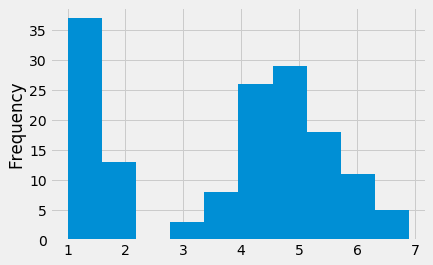

In [21]:
df['petal length in cm'].plot(kind='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c9e8860>,
      dtype=object)

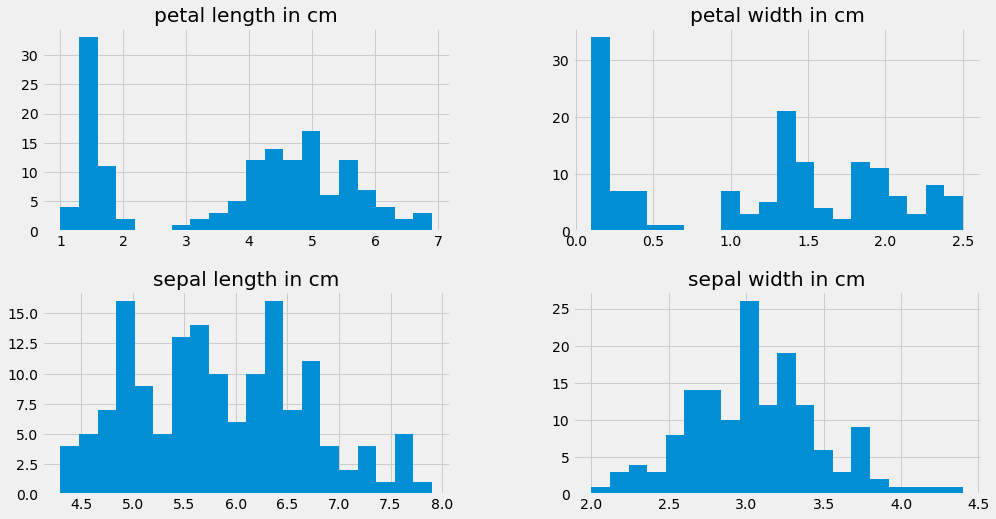

In [22]:
df.hist(bins=20, figsize=(15,8))

# `seaborn`

You can make some really elegant plots with `seaborn`, which is a wrapper around `matplotlib`

In [23]:
import seaborn as sns

In [24]:
df_melted = pd.melt(df, "class", var_name="feature")

In [25]:
df_melted.head()

,class,feature,value
0,Iris-setosa,sepal length in cm,5.1
1,Iris-setosa,sepal length in cm,4.9
2,Iris-setosa,sepal length in cm,4.7
3,Iris-setosa,sepal length in cm,4.6
4,Iris-setosa,sepal length in cm,5.0


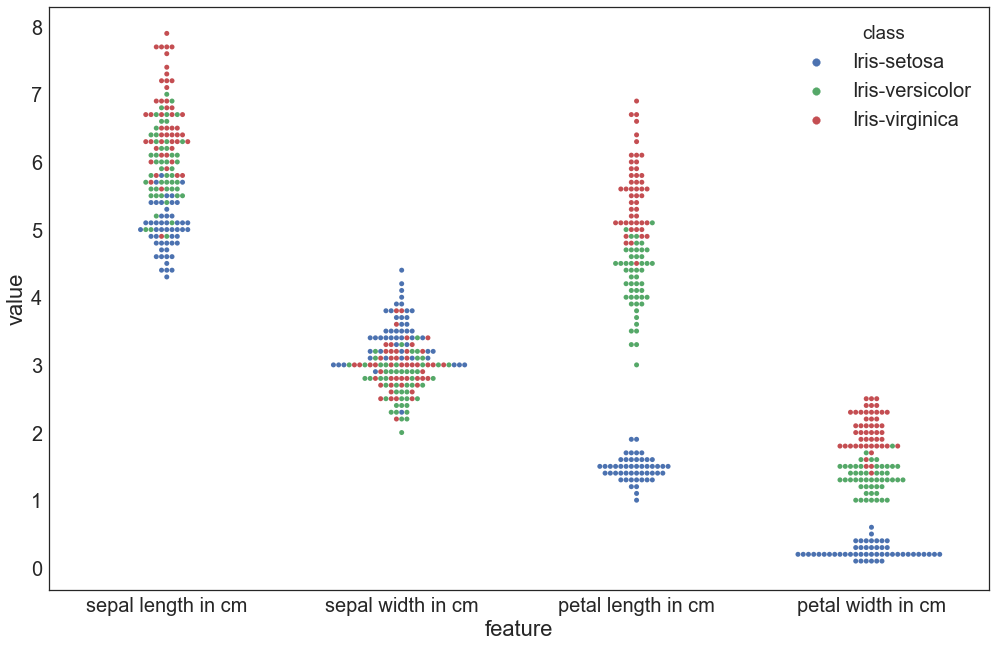

In [26]:
sns.set(style="white", rc={"figure.figsize": (15, 10)}, font_scale=2)
sns.swarmplot(x="feature", y="value", hue="class", data=df_melted)

## securethe.news

Let's use these libraries to visualize the data that securethe.news has been collecting.

### Using the API

STN has a simple API we can query to grab the scan data: https://securethe.news/api/v1/sites/

In [27]:
import json, requests

r = requests.get('https://securethe.news/api/v1/sites/?limit=1000')
df = pd.read_json(r.text)

### Let's look at the good stuff!

In [28]:
df.head()

,count,next,previous,results
0,131,NaN,NaN,"{'name': 'ABC.es', 'slug': 'abces', 'domain': ..."
1,131,NaN,NaN,"{'name': 'ABC News', 'slug': 'abc-news', 'doma..."
2,131,NaN,NaN,"{'name': 'Al Arabiya', 'slug': 'al-arabiya', '..."
3,131,NaN,NaN,"{'name': 'Al Jazeera', 'slug': 'al-jazeera', '..."
4,131,NaN,NaN,"{'name': 'Anandabazar', 'slug': 'anandabazar',..."


In [29]:
df['results'].head()

0    {'name': 'ABC.es', 'slug': 'abces', 'domain': ...
1    {'name': 'ABC News', 'slug': 'abc-news', 'doma...
2    {'name': 'Al Arabiya', 'slug': 'al-arabiya', '...
3    {'name': 'Al Jazeera', 'slug': 'al-jazeera', '...
4    {'name': 'Anandabazar', 'slug': 'anandabazar',...
Name: results, dtype: object

### Create `DataFrame` from JSON API output

In [30]:
from pandas.io.json import json_normalize

results_df = json_normalize(df['results'])

In [31]:
results_df.head()

,added,all_scans,domain,latest_scan.defaults_to_https,latest_scan.downgrades_https,latest_scan.grade,latest_scan.hsts,latest_scan.hsts_entire_domain,latest_scan.hsts_max_age,latest_scan.hsts_preload_ready,latest_scan.hsts_preloaded,latest_scan.live,latest_scan.score,latest_scan.timestamp,latest_scan.valid_https,name,slug
0,2016-11-22T18:37:39.934408Z,https://securethe.news/api/v1/sites/abc.es/scans/,abc.es,False,False,F,False,None,NaN,False,False,True,0,2018-02-14T16:00:17.239407Z,None,ABC.es,abces
1,2016-11-22T18:37:39.371341Z,https://securethe.news/api/v1/sites/abcnews.go...,abcnews.go.com,False,False,C,False,None,NaN,False,False,True,50,2018-02-14T16:00:21.580017Z,True,ABC News,abc-news
2,2016-11-22T18:37:39.941184Z,https://securethe.news/api/v1/sites/alarabiya....,alarabiya.net,False,False,C,False,None,NaN,False,False,True,50,2018-02-14T16:00:30.779359Z,True,Al Arabiya,al-arabiya
3,2016-11-22T18:37:39.413905Z,https://securethe.news/api/v1/sites/aljazeera....,aljazeera.com,False,False,C,False,None,NaN,False,False,True,50,2018-02-14T16:00:35.604345Z,True,Al Jazeera,al-jazeera
4,2016-11-22T18:37:39.737176Z,https://securethe.news/api/v1/sites/anandabaza...,anandabazar.com,False,True,F,False,None,NaN,False,False,True,0,2018-02-14T16:00:41.173307Z,None,Anandabazar,anandabazar


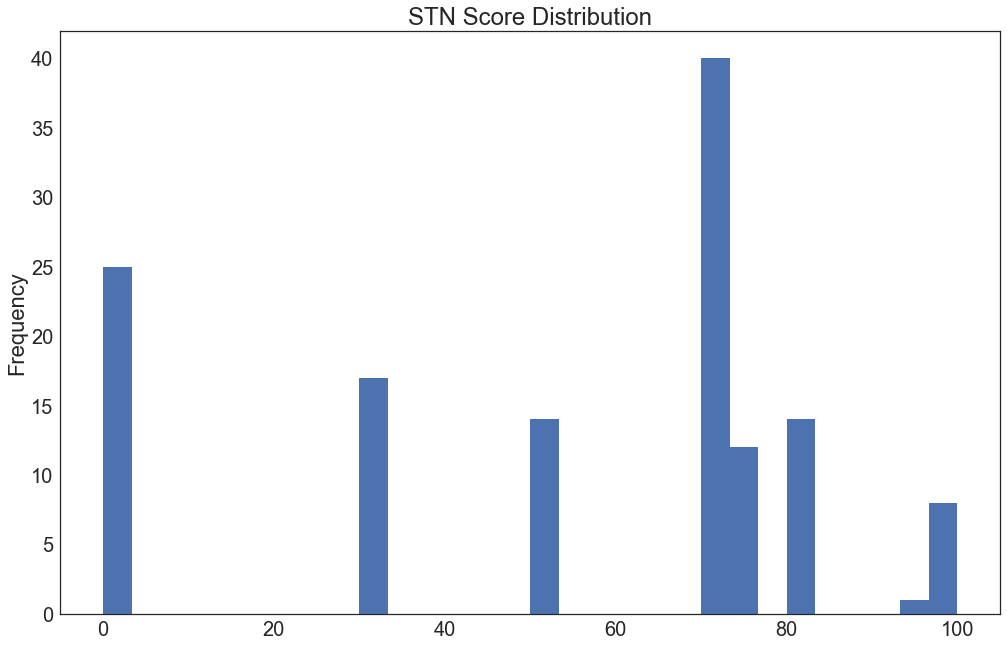

In [32]:
results_df["latest_scan.score"].plot('hist', title='STN Score Distribution', bins=30)

# Top scorers

In [33]:
results_df[results_df["latest_scan.score"] > 85]

,added,all_scans,domain,latest_scan.defaults_to_https,latest_scan.downgrades_https,latest_scan.grade,latest_scan.hsts,latest_scan.hsts_entire_domain,latest_scan.hsts_max_age,latest_scan.hsts_preload_ready,latest_scan.hsts_preloaded,latest_scan.live,latest_scan.score,latest_scan.timestamp,latest_scan.valid_https,name,slug
18,2016-12-17T02:36:10.047116Z,https://securethe.news/api/v1/sites/publicinte...,publicintegrity.org,True,False,A+,True,True,63072000.0,True,True,True,100,2018-02-14T16:01:57.183796Z,True,Center for Public Integrity,center-for-public-integrity
24,2017-02-09T18:12:33.998580Z,https://securethe.news/api/v1/sites/computerba...,computerbase.de,True,False,A+,True,True,63072000.0,True,True,True,100,2018-02-14T16:02:36.906178Z,True,ComputerBase,computerbase
53,2016-11-22T18:37:39.593020Z,https://securethe.news/api/v1/sites/infobae.co...,infobae.com,True,False,A+,True,True,31536000.0,True,True,True,100,2018-02-14T16:06:53.402458Z,True,Infobae,infobae
59,2017-02-02T03:04:28.398678Z,https://securethe.news/api/v1/sites/letemps.ch...,letemps.ch,True,False,A+,True,True,15552000.0,True,True,True,100,2018-02-14T16:07:50.336324Z,True,Le Temps,le-temps
62,2016-12-17T02:35:43.317597Z,https://securethe.news/api/v1/sites/themarshal...,themarshallproject.org,True,False,A+,True,True,31536000.0,True,True,True,100,2018-02-14T16:08:15.632999Z,True,Marshall Project,marshall-project
86,2016-11-22T18:37:39.729717Z,https://securethe.news/api/v1/sites/news.sky.c...,news.sky.com,True,False,A,True,True,31536000.0,True,False,True,95,2018-02-14T16:11:31.666750Z,True,Sky News,sky-news
94,2016-12-17T02:36:35.000088Z,https://securethe.news/api/v1/sites/techdirt.c...,techdirt.com,True,False,A+,True,True,15552000.0,True,True,True,100,2018-02-14T16:12:27.346476Z,True,Techdirt,techdirt
106,2016-11-22T18:37:39.608333Z,https://securethe.news/api/v1/sites/theinterce...,theintercept.com,True,False,A+,True,True,15768000.0,True,True,True,100,2018-02-14T16:13:35.807478Z,True,The Intercept,the-intercept
110,2017-01-18T01:16:31.804721Z,https://securethe.news/api/v1/sites/theoutline...,theoutline.com,True,False,A+,True,True,31536000.0,True,True,True,100,2018-02-14T16:14:00.550546Z,True,The Outline,the-outline


# Low scorers

In [34]:
results_df[results_df["latest_scan.score"] < 20]

,added,all_scans,domain,latest_scan.defaults_to_https,latest_scan.downgrades_https,latest_scan.grade,latest_scan.hsts,latest_scan.hsts_entire_domain,latest_scan.hsts_max_age,latest_scan.hsts_preload_ready,latest_scan.hsts_preloaded,latest_scan.live,latest_scan.score,latest_scan.timestamp,latest_scan.valid_https,name,slug
0,2016-11-22T18:37:39.934408Z,https://securethe.news/api/v1/sites/abc.es/scans/,abc.es,False,False,F,False,None,NaN,False,False,True,0,2018-02-14T16:00:17.239407Z,None,ABC.es,abces
4,2016-11-22T18:37:39.737176Z,https://securethe.news/api/v1/sites/anandabaza...,anandabazar.com,False,True,F,False,None,NaN,False,False,True,0,2018-02-14T16:00:41.173307Z,None,Anandabazar,anandabazar
5,2016-11-22T18:37:39.489349Z,https://securethe.news/api/v1/sites/andhrajyot...,andhrajyothy.com,False,False,F,False,None,NaN,False,False,True,0,2018-02-14T16:00:49.559633Z,False,Andhrajyothi,andhrajyothi
13,2016-11-23T19:38:34.685643Z,https://securethe.news/api/v1/sites/breitbart....,breitbart.com,False,False,F,False,None,NaN,False,False,True,0,2018-02-14T16:01:33.339684Z,None,Breitbart,breitbart
26,2016-11-22T18:37:39.661192Z,https://securethe.news/api/v1/sites/corriere.i...,corriere.it,False,False,F,False,None,NaN,False,False,True,0,2018-02-14T16:03:00.381916Z,None,Corriere della Sera,corriere-della-sera
28,2017-02-13T22:36:12.115769Z,https://securethe.news/api/v1/sites/zeit.de/sc...,zeit.de,False,False,F,False,None,NaN,False,False,True,0,2018-02-14T16:03:17.996403Z,False,Die ZEIT,die-zeit
29,2016-11-22T18:37:39.453447Z,https://securethe.news/api/v1/sites/dnaindia.c...,dnaindia.com,False,False,F,False,None,NaN,False,False,True,0,2018-02-14T16:03:29.051712Z,None,DNA India,dna-india
30,2016-11-23T19:38:03.360489Z,https://securethe.news/api/v1/sites/drudgerepo...,drudgereport.com,False,False,F,False,None,NaN,False,False,True,0,2018-02-14T16:03:32.930440Z,False,Drudge Report,drudge-report
35,2016-11-22T18:37:39.684339Z,https://securethe.news/api/v1/sites/euronews.c...,euronews.com,False,False,F,False,None,NaN,False,False,True,0,2018-02-14T16:04:37.338348Z,False,Euronews,euronews
43,2016-11-22T18:37:39.623572Z,https://securethe.news/api/v1/sites/france24.c...,france24.com,False,False,F,False,None,NaN,False,False,True,0,2018-02-14T16:05:22.024144Z,None,France 24,france-24


# Compare percentage of news orgs that do and do not enable HTTPS by default

In [35]:
https_default = pd.DataFrame(results_df['latest_scan.defaults_to_https'].value_counts())

In [36]:
https_default

,latest_scan.defaults_to_https
True,75
False,56


Convert these absolute numbers to percentages:

In [37]:
https_default['value percentage'] = https_default['latest_scan.defaults_to_https'] / https_default['latest_scan.defaults_to_https'].sum() * 100.

In [38]:
https_default['value percentage']

True     57.251908
False    42.748092
Name: value percentage, dtype: float64

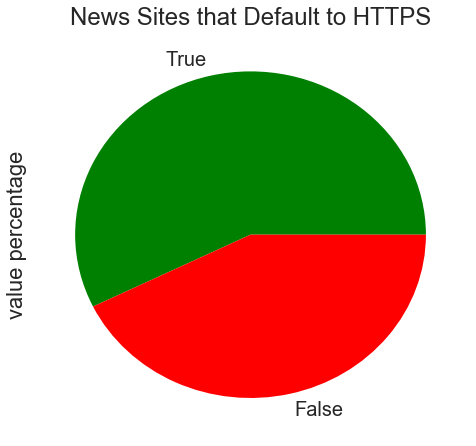

In [39]:
https_default['value percentage'].plot(kind='pie', title='News Sites that Default to HTTPS', colors=['g','r'], figsize=(7, 7))

# Group by operations

Group by enables one to collapse the result set along a column using a specified aggregation function

In [40]:
results_df.groupby('latest_scan.grade').aggregate('mean')

,latest_scan.defaults_to_https,latest_scan.downgrades_https,latest_scan.hsts,latest_scan.hsts_max_age,latest_scan.hsts_preloaded,latest_scan.live,latest_scan.score
latest_scan.grade,,,,,,,
A,1.0,0.00,1.000000,31536000.0,0.0,1.0,95
A+,1.0,0.00,1.000000,33453000.0,1.0,1.0,100
A-,1.0,0.00,0.928571,25536700.0,0.0,1.0,80
B,1.0,0.00,0.000000,0.0,0.0,1.0,70
B+,1.0,0.00,1.000000,1159310.0,0.0,1.0,75
C,0.0,0.00,0.071429,31536000.0,0.0,1.0,50
D,0.0,1.00,0.000000,NaN,0.0,1.0,30
F,0.0,0.04,0.000000,NaN,0.0,1.0,0


# Manipulating timeseries

In [41]:
results_df.head()

,added,all_scans,domain,latest_scan.defaults_to_https,latest_scan.downgrades_https,latest_scan.grade,latest_scan.hsts,latest_scan.hsts_entire_domain,latest_scan.hsts_max_age,latest_scan.hsts_preload_ready,latest_scan.hsts_preloaded,latest_scan.live,latest_scan.score,latest_scan.timestamp,latest_scan.valid_https,name,slug
0,2016-11-22T18:37:39.934408Z,https://securethe.news/api/v1/sites/abc.es/scans/,abc.es,False,False,F,False,None,NaN,False,False,True,0,2018-02-14T16:00:17.239407Z,None,ABC.es,abces
1,2016-11-22T18:37:39.371341Z,https://securethe.news/api/v1/sites/abcnews.go...,abcnews.go.com,False,False,C,False,None,NaN,False,False,True,50,2018-02-14T16:00:21.580017Z,True,ABC News,abc-news
2,2016-11-22T18:37:39.941184Z,https://securethe.news/api/v1/sites/alarabiya....,alarabiya.net,False,False,C,False,None,NaN,False,False,True,50,2018-02-14T16:00:30.779359Z,True,Al Arabiya,al-arabiya
3,2016-11-22T18:37:39.413905Z,https://securethe.news/api/v1/sites/aljazeera....,aljazeera.com,False,False,C,False,None,NaN,False,False,True,50,2018-02-14T16:00:35.604345Z,True,Al Jazeera,al-jazeera
4,2016-11-22T18:37:39.737176Z,https://securethe.news/api/v1/sites/anandabaza...,anandabazar.com,False,True,F,False,None,NaN,False,False,True,0,2018-02-14T16:00:41.173307Z,None,Anandabazar,anandabazar


In [42]:
results_df['added'].head()

0    2016-11-22T18:37:39.934408Z
1    2016-11-22T18:37:39.371341Z
2    2016-11-22T18:37:39.941184Z
3    2016-11-22T18:37:39.413905Z
4    2016-11-22T18:37:39.737176Z
Name: added, dtype: object

## Convert column type to datetime object

In [43]:
results_df['added'] = pd.to_datetime(results_df['added'])

In [44]:
results_df['added'].head()

0   2016-11-22 18:37:39.934408
1   2016-11-22 18:37:39.371341
2   2016-11-22 18:37:39.941184
3   2016-11-22 18:37:39.413905
4   2016-11-22 18:37:39.737176
Name: added, dtype: datetime64[ns]

## News sites added since Jan, 1 2017

In [45]:
is_since_jan_1_2017 = results_df['added'] > np.datetime64('2017-01-01')

In [46]:
type(is_since_jan_1_2017)

pandas.core.series.Series

In [47]:
results_df[is_since_jan_1_2017]['domain']

8                axios.com
10                 bild.de
20                 chip.de
22                cnet.com
24         computerbase.de
25         computerbild.de
28                 zeit.de
38     fivethirtyeight.com
39                focus.de
46                golem.de
47                heise.de
49          hongkongfp.com
54        oglobo.globo.com
59              letemps.ch
68                  nzz.ch
72                  nrk.no
83               scroll.in
89                stern.de
92                  taz.de
110         theoutline.com
114      theundefeated.com
Name: domain, dtype: object

# Groupby timeseries data

In [48]:
results_df.groupby([pd.Grouper(key='added', freq='Y')]).aggregate('sum')

,latest_scan.defaults_to_https,latest_scan.downgrades_https,latest_scan.hsts,latest_scan.hsts_max_age,latest_scan.hsts_preloaded,latest_scan.live,latest_scan.score
added,,,,,,,
2016-12-31,61.0,15.0,29.0,460815720.0,5.0,110.0,5595
2017-12-31,14.0,3.0,6.0,247305100.0,3.0,21.0,1330


In [49]:
results_df.groupby([pd.Grouper(key='added', freq='Y')]).aggregate('mean')

,latest_scan.defaults_to_https,latest_scan.downgrades_https,latest_scan.hsts,latest_scan.hsts_max_age,latest_scan.hsts_preloaded,latest_scan.live,latest_scan.score
added,,,,,,,
2016-12-31,0.554545,0.136364,0.263636,1.486502e+07,0.045455,1.0,50.863636
2017-12-31,0.666667,0.142857,0.285714,4.121752e+07,0.142857,1.0,63.333333


## Possible Next Steps

* Filter out less popular news sites using the Alexa Top N:
  * Scrape data from https://www.alexa.com/topsites/category/News
  * Create `DataFrame` of top N news websites
  * Merge with existing `results_df`: you would use an inner `pd.join()` to do so
* Use API to get all timeseries data and plot scores for news orgs as a function of time

## More Resources

* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlas
* [Python for Data Analysis](http://wesmckinney.com/pages/book.html) by Wes McKinney
* The [gallery of interesting IPython notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)
* An introduction to $\LaTeX$ typesetting: http://www.math.harvard.edu/texman/